In [3]:
import cv2
import math
import argparse
import sys, time
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from sklearn.cluster import MiniBatchKMeans
from google.colab.patches import cv2_imshow

#Question 1: Sampling and Quantization 
For this image, perform the following tasks -

(a) Perform quantization with K = 2,4,8 where K is the number of bits representing the
intensity values. Note your observations about the image quality.

(b) Use the K-means clustering algorithm to quantize the image into clusters such that the
image has k colors. K = 2,8,16,32,40 (You can use scikit-learn for K-means clustering
algorithm).

In [4]:
barbara_assign1 = imread('/content/barbara.jpg')
print(barbara_assign1)

[[ 87  92  97 ... 107 115 116]
 [109 112 121 ... 123 128 130]
 [162 161 172 ... 136 134 142]
 ...
 [ 82  88  89 ... 111 112 104]
 [ 84  85  84 ... 112 114 106]
 [ 83  80  83 ... 111 112 104]]


[ 2  4  8 16]


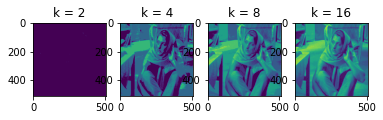

In [5]:
k = 2**np.arange(1, 5)
print(k)
figure, axis = plt.subplots(1, len(k), figsize=(6, 6))
for k, ax in zip(k, axis):
    bins = np.linspace(0, barbara_assign1.max(), k)
    image = (np.vectorize(bins.tolist().__getitem__)(np.digitize(barbara_assign1, bins)-1))
    ax.imshow(image)
    ax.set_title('k = {}'.format(k))

k = 2


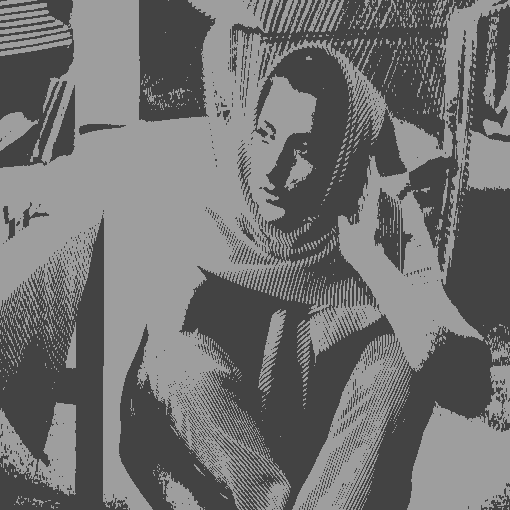

k = 8


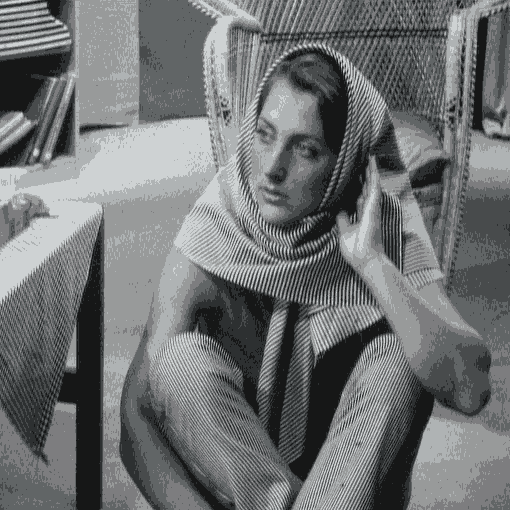

k = 16


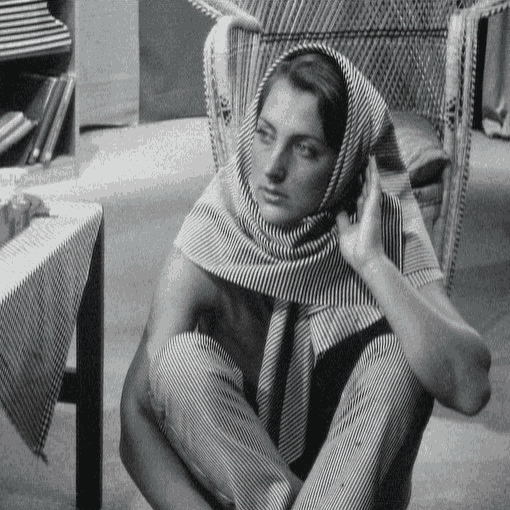

k = 32


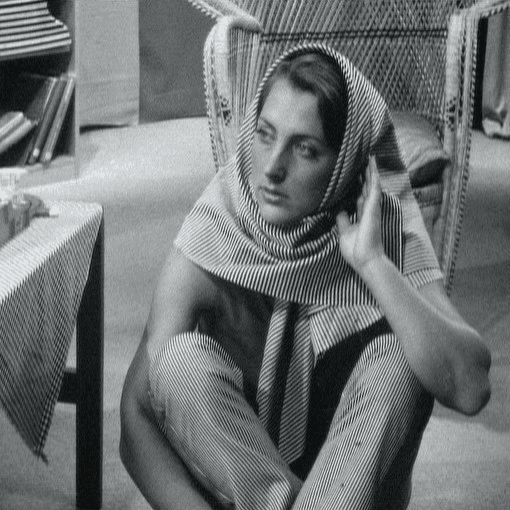

k = 40


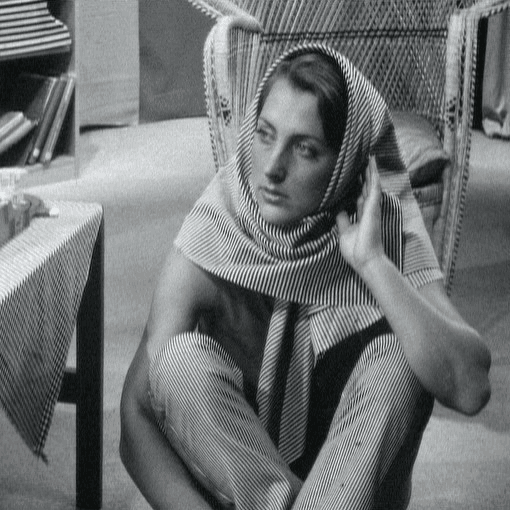

In [8]:
image = cv2.imread('/content/barbara.jpg')
(h, w) = image.shape[:2]
k = [2,8,16,32,40]
for k in k:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = MiniBatchKMeans(n_clusters = k)
    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]
    quant = quant.reshape((h, w, 3))
    image = image.reshape((h, w, 3))
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    print('k = {}'.format(k))
    cv2_imshow(np.hstack([quant]))

#Question 2: Image interpolation

For this image, perform the following tasks by linear interpolation and bicubic interpolation
techniques. (you can not use inbuilt functions)
(a) Write the interpolation kernel function

(b) Add padding

(c) Perform the interpolation

(d) Compare the output image with input image

(e) Resize the output image (dimension should be same as input image) using interpolation function

(f) Compare the output image 1st and 2nd with the input image. Write the observations.

In [ ]:
def u(s, a):
  if (abs(s) >= 0) & (abs(s) <= 1):
    return (a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1
  elif (abs(s) > 1) & (abs(s) <= 2):
    return a*(abs(s)**3)-(5*a)*(abs(s)**2)+(8*a)*abs(s)-4*a
  else:
    return 0

In [ ]:
image = cv2.imread('/content/barbara-assign1.jpg')
H, W, C = image.shape
padded_img = np.zeros((H+4, W+4, C))

padded_img[2:H+2, 2:W+2, :C] = image
      
# Pad the first/last two col and row
padded_img[2:H+2, 0:2, :C] = image[:, 0:1, :C]
padded_img[H+2:H+4, 2:W+2, :] = image[H-1:H, :, :]
padded_img[2:H+2, W+2:W+4, :] = image[:, W-1:W, :]
padded_img[0:2, 2:W+2, :C] = image[0:1, :, :C]

      
# Pad the missing eight points
padded_img[0:2, 0:2, :C] = image[0, 0, :C]
padded_img[H+2:H+4, 0:2, :C] = image[H-1, 0, :C]
padded_img[H+2:H+4, W+2:W+4, :C] = image[H-1, W-1, :C]
padded_img[0:2, W+2:W+4, :C] = image[0, W-1, :C]


In [ ]:
dH = math.floor(H*2)
dW = math.floor(W*2)
# Converting into matrix
dst = np.zeros((dH, dW, 3))
h = 0.5

In [ ]:
for c in range(C):
        for j in range(dH):
            for i in range(dW):
                
                # Getting the coordinates of the
                # nearby values
                x, y = i * h + 2, j * h + 2
  
                x1 = 1 + x - math.floor(x)
                x2 = x - math.floor(x)
                x3 = math.floor(x) + 1 - x
                x4 = math.floor(x) + 2 - x
  
                y1 = 1 + y - math.floor(y)
                y2 = y - math.floor(y)
                y3 = math.floor(y) + 1 - y
                y4 = math.floor(y) + 2 - y
                  
                # Considering all nearby 16 values
                mat_l = np.matrix([[u(x1, -0.5), u(x2, -0.5), u(x3, -0.5), u(x4, -0.5)]])
                mat_m = np.matrix([[padded_img[int(y-y1), int(x-x1), c],
                                    padded_img[int(y-y2), int(x-x1), c],
                                    padded_img[int(y+y3), int(x-x1), c],
                                    padded_img[int(y+y4), int(x-x1), c]],
                                   [padded_img[int(y-y1), int(x-x2), c],
                                    padded_img[int(y-y2), int(x-x2), c],
                                    padded_img[int(y+y3), int(x-x2), c],
                                    padded_img[int(y+y4), int(x-x2), c]],
                                   [padded_img[int(y-y1), int(x+x3), c],
                                    padded_img[int(y-y2), int(x+x3), c],
                                    padded_img[int(y+y3), int(x+x3), c],
                                    padded_img[int(y+y4), int(x+x3), c]],
                                   [padded_img[int(y-y1), int(x+x4), c],
                                    padded_img[int(y-y2), int(x+x4), c],
                                    padded_img[int(y+y3), int(x+x4), c],
                                    padded_img[int(y+y4), int(x+x4), c]]])
                mat_r = np.matrix(
                    [[u(y1, -0.5)], [u(y2, -0.5)], [u(y3, -0.5)], [u(y4, -0.5)]])
                  
                # Here the dot function is used to get 
                # the dot product of 2 matrices
                dst[j, i, c] = np.dot(np.dot(mat_l, mat_m), mat_r)

In [ ]:
cv2.imwrite('bicubic.png', dst) 
bicubicImg=cv2.imread('bicubic.png')

In [ ]:
print('Original Image Shape:',padded_img.shape)
print('Generated Bicubic Image Shape:',bicubicImg.shape)

Original Image Shape: (514, 514, 3)
Generated Bicubic Image Shape: (1020, 1020, 3)


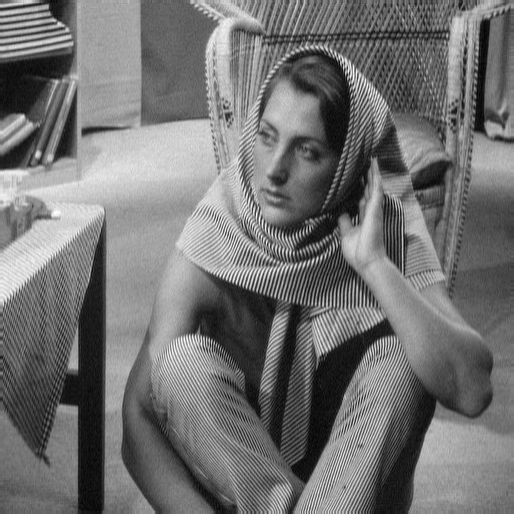

In [ ]:
cv2_imshow(padded_img)

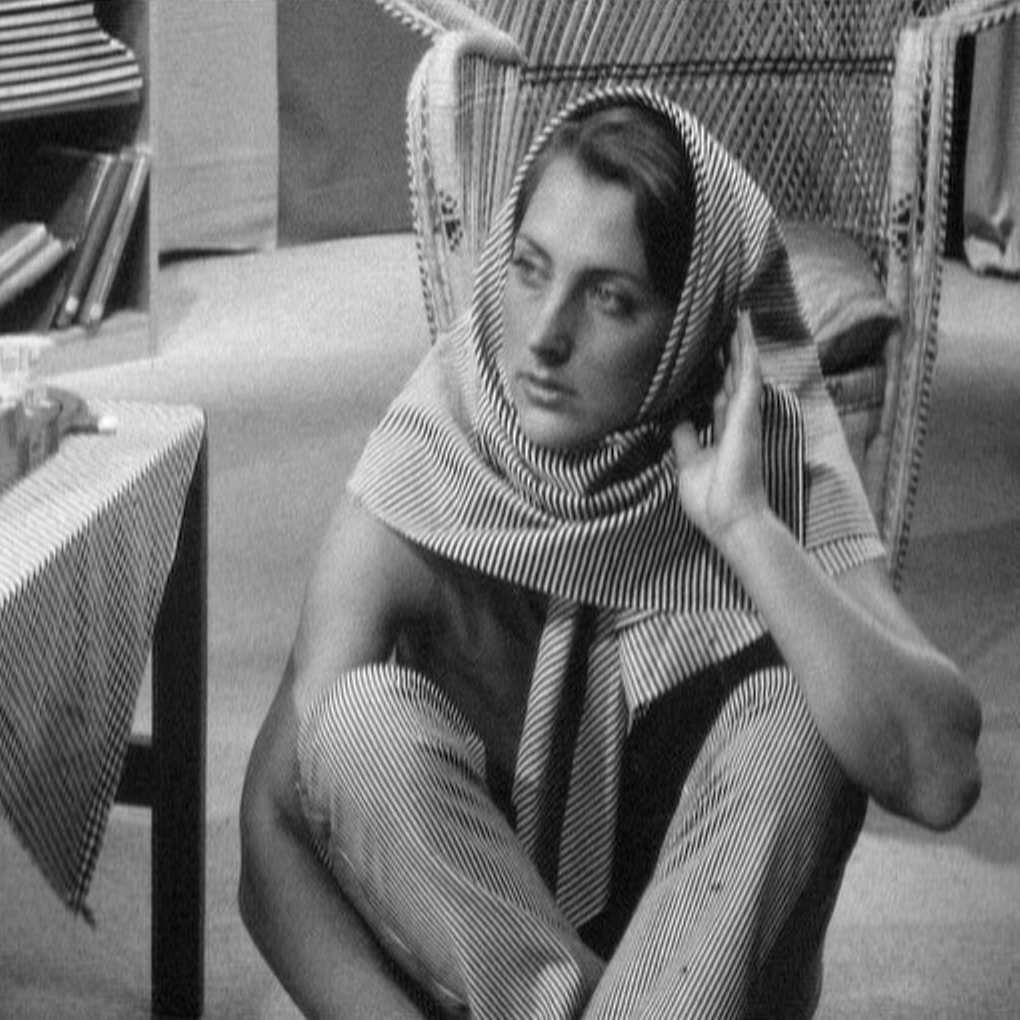

In [ ]:
cv2_imshow(bicubicImg)

#Question 3: Affine Transformation

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read the input image
img = cv2.imread('/content/barbara-assign1.jpg')
# convert from BGR to RGB so we can plot using matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Translation by 2 pixels in any direction.

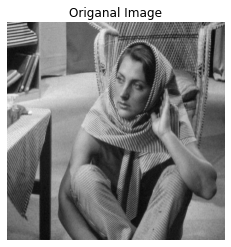

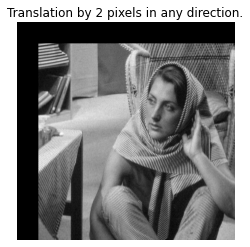

In [ ]:
# disable x & y axis
plt.axis('off')
# show the image
plt.imshow(img)
plt.title('Origanal Image')
plt.show()
# get the image shape
rows, cols, dim = img.shape
# transformation matrix for translation
#The value of bx defines how much the image will be moved in the x-axis and the value of by determines the movement of the image in the y-axis:
M = np.float32([[1, 0, 50],
                [0, 1, 50],
                [0, 0, 1]])
# apply a perspective transformation to the image
translated_img = cv2.warpPerspective(img, M, (cols, rows))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(translated_img)
plt.title('Translation by 2 pixels in any direction.')
plt.show()

Scaling by a factor of 2 in the x-direction.

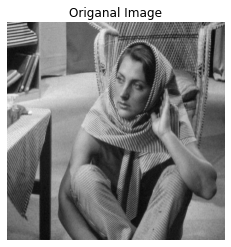

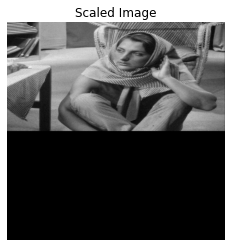

In [ ]:
plt.axis('off')
# show the image
plt.title('Origanal Image')
plt.imshow(img)
plt.show()
# get the image shape
rows, cols, dim = img.shape
#transformation matrix for Scaling
M = np.float32([[2, 0  , 0],
            	[0,   1, 0],
            	[0,   0,   1]])
# apply a perspective transformation to the image
scaled_img = cv2.warpPerspective(img,M,(cols*2,rows*2))
# disable x & y axis
plt.axis('off')
plt.imshow(img)
# show the resulting image
plt.title('Scaled Image')
plt.imshow(scaled_img)
plt.show()

Rotation

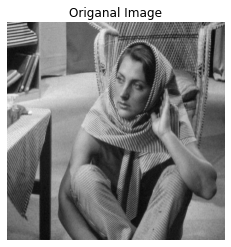

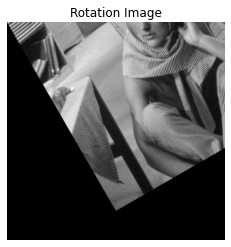

In [ ]:
# disable x & y axis
plt.axis('off')
# show the image
plt.title('Origanal Image')
plt.imshow(img)
plt.show()
# get the image shape
rows, cols, dim = img.shape
#angle from degree to radian
angle = np.radians(-30)
#transformation matrix for Rotation
M = np.float32([[np.cos(angle), -(np.sin(angle)), 0],
            	[np.sin(angle), np.cos(angle), 0],
            	[0, 0, 1]])
# apply a perspective transformation to the image
rotated_img = cv2.warpPerspective(img, M, (int(cols),int(rows)))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.title('Rotation Image')
plt.imshow(rotated_img)
plt.show()


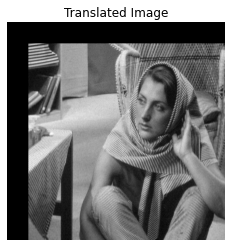

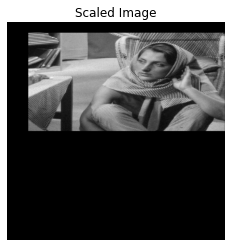

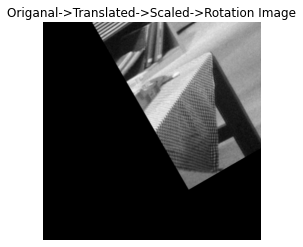

In [ ]:
# get the image shape
rows, cols, dim = img.shape

# transformation matrix for translation
#The value of bx defines how much the image will be moved in the x-axis and the value of by determines the movement of the image in the y-axis:
M = np.float32([[1, 0, 50],
                [0, 1, 50],
                [0, 0, 1]])
# apply a perspective transformation to the image
translated_img = cv2.warpPerspective(img, M, (cols, rows))
# disable x & y axis
plt.axis('off')
# show the image
plt.title('Translated Image')
plt.imshow(translated_img)
plt.show()


#transformation matrix for Scaling
M = np.float32([[2, 0  , 0],
            	[0,   1, 0],
            	[0,   0,   1]])
# apply a perspective transformation to the image
scaled_img = cv2.warpPerspective(translated_img,M,(cols*2,rows*2))
plt.axis('off')
# show the image
plt.title('Scaled Image')
plt.imshow(scaled_img)
plt.show()

#angle from degree to radian
angle = np.radians(-30)
#transformation matrix for Rotation
M = np.float32([[np.cos(angle), -(np.sin(angle)), 0],
            	[np.sin(angle), np.cos(angle), 0],
            	[0, 0, 1]])
# apply a perspective transformation to the image
final_img = cv2.warpPerspective(scaled_img, M, (int(cols),int(rows)))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.title('Origanal->Translated->Scaled->Rotation Image')
plt.imshow(final_img)
plt.show()

#Question 4: Gaussian and Laplacian Pyramid

Use a Gaussian Pyramid (three levels upto G3) to blur the image. Using the
images obtained through the Gaussian Pyramid, obtain the corresponding Laplacian Pyramid.
Write your observations.

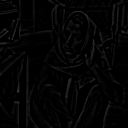

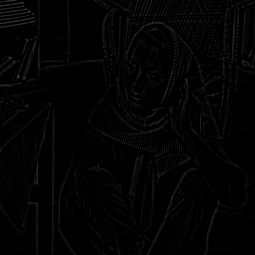

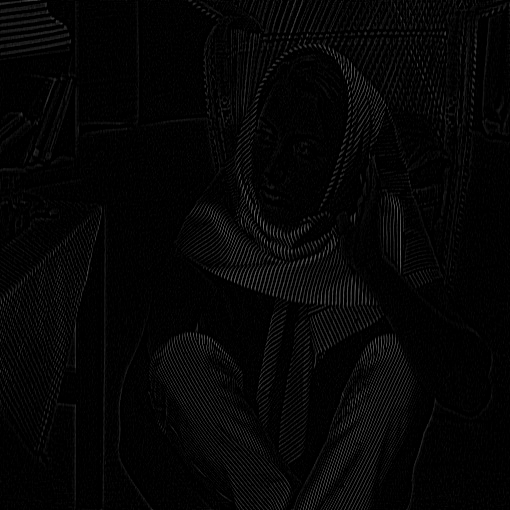

In [ ]:
lower = img.copy()
 
# Create a Gaussian Pyramid
gaussian_pyramid = [lower]
for i in range(3):
    lower = cv2.pyrDown(lower)
    gaussian_pyramid.append(lower)
 
# Last level of Gaussian remains same in Laplacian
laplacian_top = gaussian_pyramid[-1]
 
# Create a Laplacian Pyramid
laplacian_pyr = [laplacian_top]
for i in range(3,0,-1):
    size = (gaussian_pyramid[i - 1].shape[1], gaussian_pyramid[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
    laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
    laplacian_pyr.append(laplacian)
    cv2_imshow(laplacian)#'lap-{}'.format(i-1),


#Question 5: Histogram 
plot its histogram without using any visualization inbuilt function (you cannot use matplotlib or seaborn’s histogram function).
Then, perform contrast stretching and plot the
image. Also plot its histogram.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

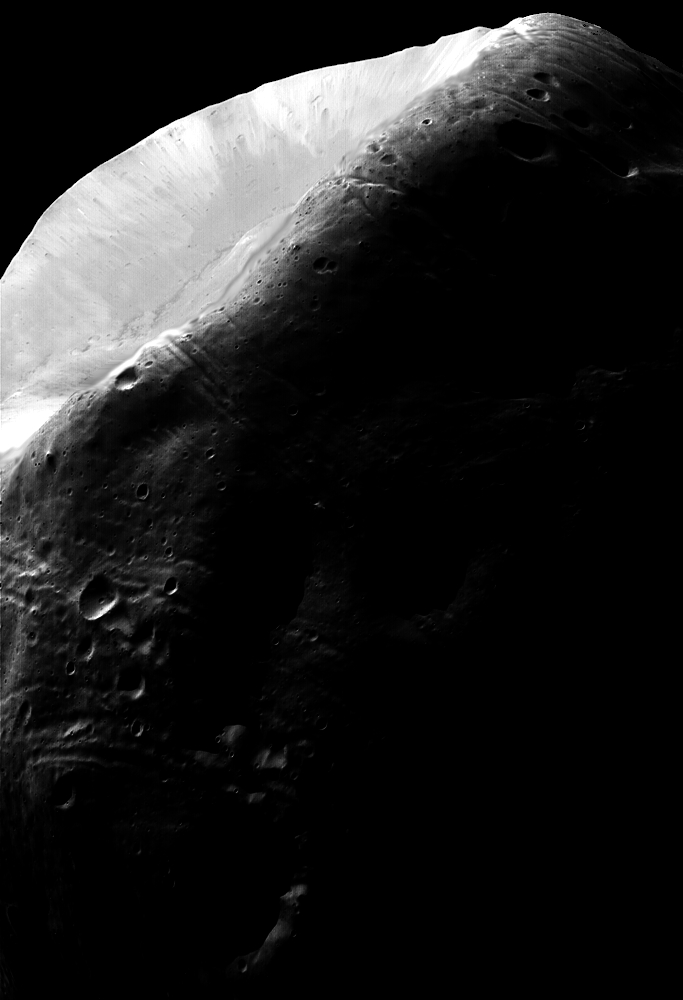

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 1

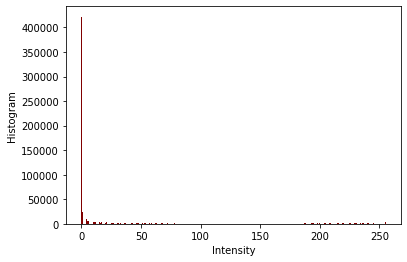

original Image


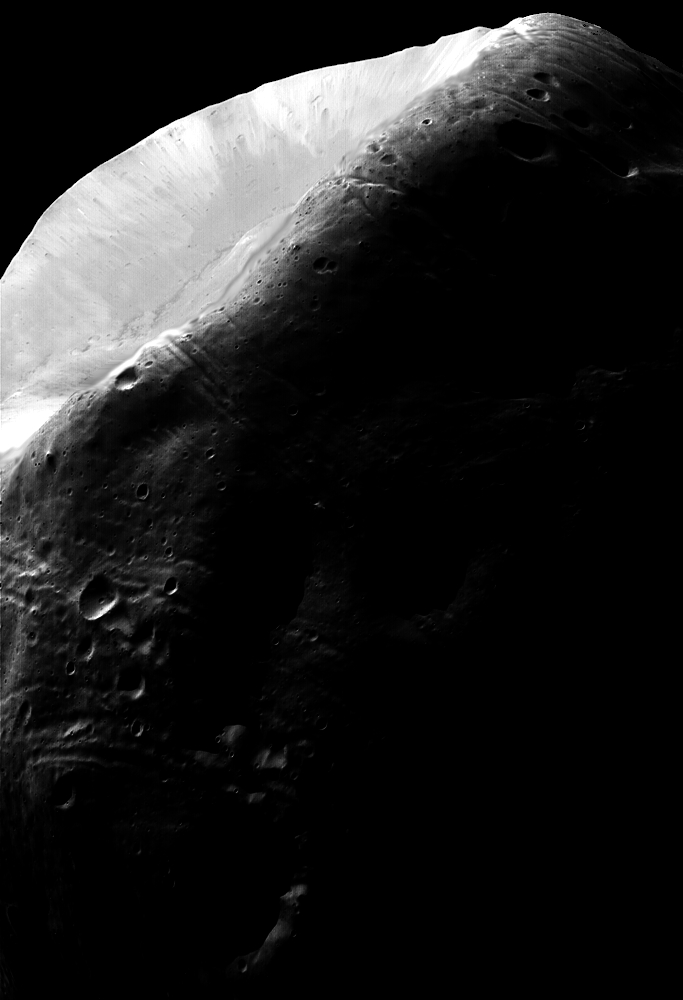

Contrast Image


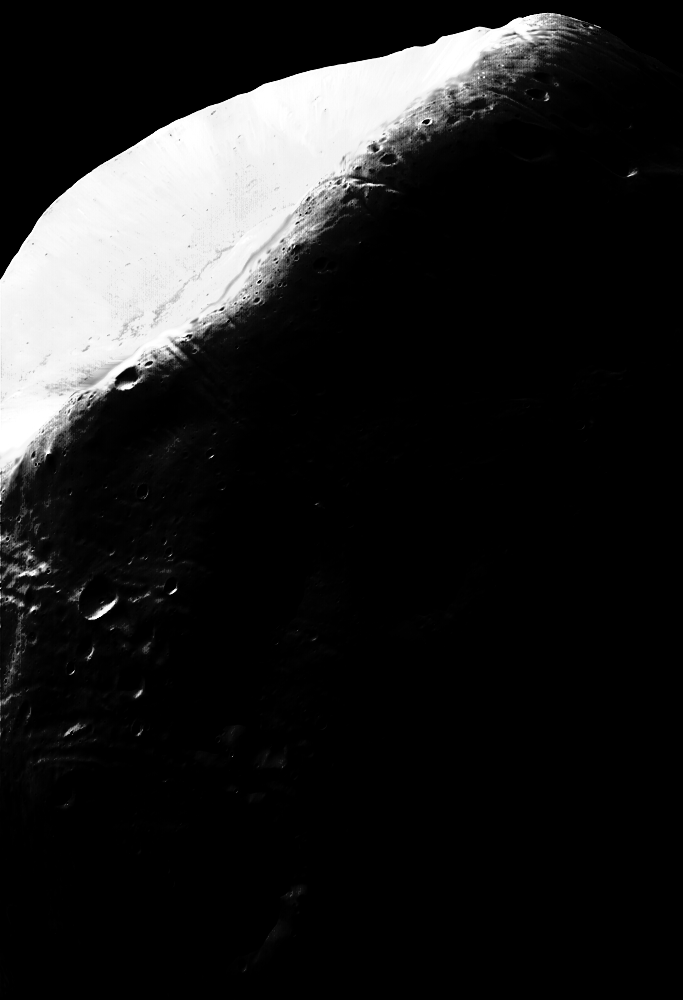

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 1

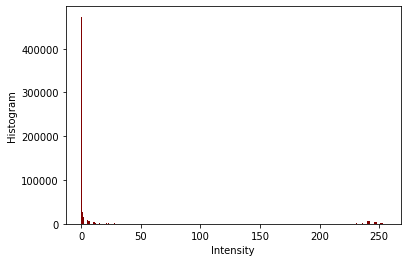

In [ ]:

A= cv2.imread('/content/moon.tif')
cv2_imshow(A)

def histogram_plot(A):
  gray=cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
  (n,m)=(gray.shape)
  k=0
  H=np.zeros((256),dtype=int)
  print(H)
  while(k<256):
    H[k]=np.count_nonzero(gray==k)
    k=k+1
  Intensity=np.arange(0,256,1)
  print(Intensity)
  print(H)
  plt.bar(Intensity,H,color='maroon',width=0.5)
  plt.xlabel("Intensity")
  plt.ylabel("Frequency")
  plt.ylabel("Histogram")
  plt.show()

histogram_plot(A)

img = A
original = img.copy()
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(img, table)
print("original Image")


cv2_imshow(original)
print("Contrast Image")


cv2_imshow(img)
histogram_plot(img)

#Question 6: Image Watermarking techniques

For this image, perform the invisible watermarking using DWT technique. Use this image as a
watermark. Extract the invisible watermark from the watermarked image. You are allowed to use
inbuilt functions.

In [ ]:
import cv2
import numpy as np
import glob
import os
#from numpy._distributor_init import NUMPY_MKL
#from numpy._distributor_init import filename

logo = cv2.imread("/content/Logo_IITJ.jpg") #loading logo image
h_logo, w_logo, _ = logo.shape #getting height and width

In [ ]:
img = cv2.imread("/content/moon.tif")
h_img, w_img, _ = img.shape

In [ ]:
#get the image's center and the spot where the watermark should be placed
center_y = int(h_img / 2)
center_x = int(w_img / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [ ]:
roi = img[top_y:bottom_y, left_x:right_x] #getting region of interest

result = cv2.addWeighted(roi, 1, logo, 0.3, 0.0) #adding logo to the ROI
img[top_y:bottom_y, left_x:right_x] = result #replacing ROI on the image

error: ignored

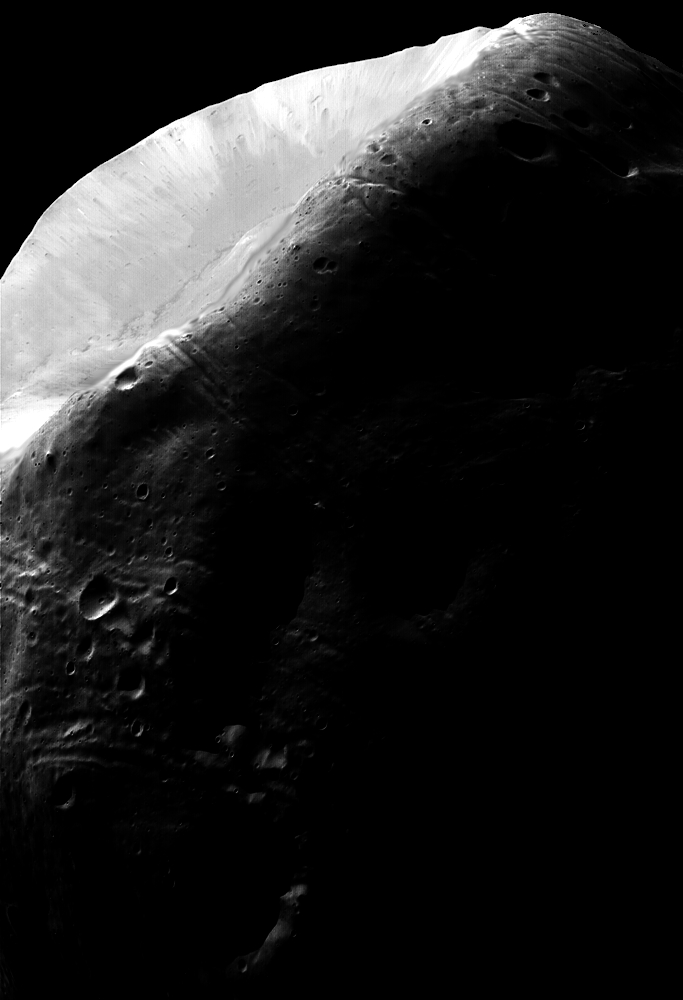

In [ ]:
cv2_imshow(img)

In [ ]:
import cv2
img = cv2.imread('/content/moon.tif')
watermark = cv2.imread("/content/barbara-assign1.jpg")

percent_of_scaling = 20
new_width = int(img.shape[1] * percent_of_scaling/100)
new_height = int(img.shape[0] * percent_of_scaling/100)
new_dim = (new_width, new_height)
resized_img = cv2.resize(img, new_dim, interpolation=cv2.INTER_AREA)

wm_scale = 40
wm_width = int(watermark.shape[1] * wm_scale/100)
wm_height = int(watermark.shape[0] * wm_scale/100)
wm_dim = (wm_width, wm_height)
resized_wm = cv2.resize(watermark, wm_dim, interpolation=cv2.INTER_AREA)

In [ ]:
h_img, w_img, _ = resized_img.shape
center_y = int(h_img/2)
center_x = int(w_img/2)
h_wm, w_wm, _ = resized_wm.shape
top_y = center_y - int(h_wm/2)
left_x = center_x - int(w_wm/2)
bottom_y = top_y + h_wm
right_x = left_x + w_wm

In [ ]:
roi = resized_img[top_y:bottom_y, left_x:right_x]

In [ ]:
result = cv2.addWeighted(roi, 1, resized_wm, 0.3, 0)

error: ignored

In [ ]:
!pip install invisible-watermark

     |████████████████████████████████| 1.6 MB 5.6 MB/s 
     |████████████████████████████████| 4.9 MB 35.0 MB/s 
     |████████████████████████████████| 12.7 MB 38.5 MB/s 


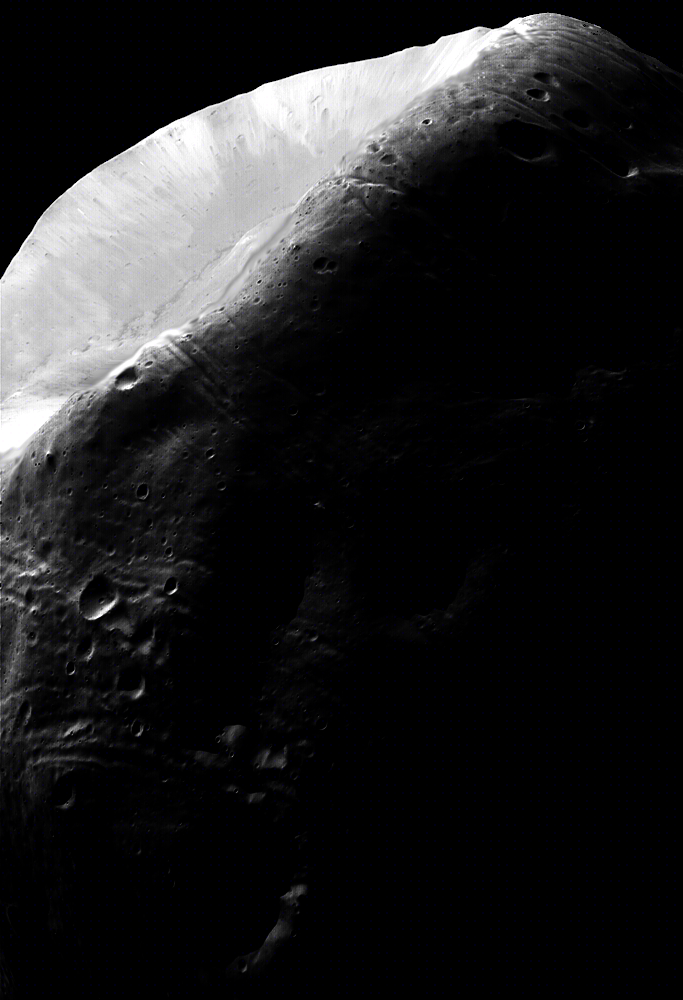

True

In [ ]:
import cv2
from imwatermark import WatermarkEncoder

bgr = cv2.imread('/content/moon.tif')
wm = 'test'

encoder = WatermarkEncoder()
encoder.set_watermark('bytes', wm.encode('utf-8'))
bgr_encoded = encoder.encode(bgr, 'dwtDct')
cv2_imshow(bgr_encoded)
cv2.imwrite('test_wm.png', bgr_encoded)

In [ ]:
import cv2
from imwatermark import WatermarkDecoder

bgr = cv2.imread('/content/test_wm.png')

decoder = WatermarkDecoder('bytes', 32)
watermark = decoder.decode(bgr, 'dwtDct')

print(watermark.decode('utf-8'))
cv2_imshow(watermark)

test


AttributeError: ignored